In [80]:
import numpy as np
import random
from matplotlib import pyplot as plt

def f(x):
    return 1 / (1 + x)

a = -6
b = -2

### Посчитаем равномерно распределенное число из интервала [0,1]

In [81]:
def get_uniform_m(a, b):
    return (a + b) / 2

def get_uniform_D(a, b):
    return (a - b)**2 / 12


m = get_uniform_m(a, b)
D = get_uniform_D(a, b)

In [82]:
def build_sample(n1=None):
    if not n1:
        n = int(input())
    else:
        n = n1
    ksi = []
    if not n or n == 1:
        ksi = [0.5]
    else:
        for i in range(n):
            ksi.append(np.random.uniform(0, 1))
    X = [t*(b-a)+a for t in ksi]
    Y = [f(x) for x in X]
    Y_var = sorted(Y)
    counts = {}
    for y in Y_var:
        counts[y] = counts.get(y, 0) + 1
    F = [0]
    for i in range(len(Y_var)-1):
        F.append(F[i] + counts[Y_var[i]] / n)
    return X, Y, Y_var, F, n


### Построим вариационный ряд и эмпирическую функцию распределения

30
1. 	y=-0.886306, 	F = 0
2. 	y=-0.850999, 	F = 0.03333333333333333
3. 	y=-0.751295, 	F = 0.06666666666666667
4. 	y=-0.674014, 	F = 0.1
5. 	y=-0.581911, 	F = 0.13333333333333333
6. 	y=-0.531929, 	F = 0.16666666666666666
7. 	y=-0.519614, 	F = 0.19999999999999998
8. 	y=-0.506002, 	F = 0.2333333333333333
9. 	y=-0.494090, 	F = 0.26666666666666666
10. 	y=-0.420908, 	F = 0.3
11. 	y=-0.414051, 	F = 0.3333333333333333
12. 	y=-0.400183, 	F = 0.36666666666666664
13. 	y=-0.383531, 	F = 0.39999999999999997
14. 	y=-0.381588, 	F = 0.4333333333333333
15. 	y=-0.364679, 	F = 0.4666666666666666
16. 	y=-0.353032, 	F = 0.49999999999999994
17. 	y=-0.341798, 	F = 0.5333333333333333
18. 	y=-0.328478, 	F = 0.5666666666666667
19. 	y=-0.311667, 	F = 0.6
20. 	y=-0.311075, 	F = 0.6333333333333333
21. 	y=-0.294481, 	F = 0.6666666666666666
22. 	y=-0.280740, 	F = 0.7
23. 	y=-0.280317, 	F = 0.7333333333333333
24. 	y=-0.270502, 	F = 0.7666666666666666
25. 	y=-0.262325, 	F = 0.7999999999999999
26. 	y=-0.256061, 	F = 0

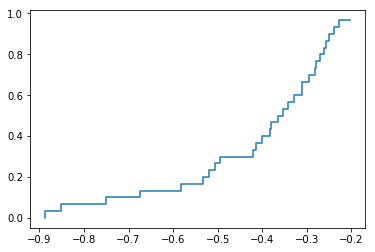

In [83]:
X, Y, Y_var, F, n = build_sample()

for i in range(len(Y_var)):
    print('{i}. \ty={0:.6f}, \tF = {F}'.format(Y_var[i], F=F[i], i=i+1))

def distr_fun(x):
    for i in range(1, len(Y_var)):
        if Y_var[i - 1] <= x < Y_var[i]:
            return F[i - 1]
    return 1
    
plt.step(Y_var, F)

In [84]:
def g(y):
    return 1/4*(-1-1/y)

def h(y):
    return 1/(4*y**2)

H = [h(y) for y in Y_var]
G = [g(y) for y in Y_var]

### Найдем точечное значение матожидания случайной величины

In [85]:
X, Y, Y_var, F, n = build_sample()
m_p = np.sum(Y_var) / n
print(m_p)

20
-0.428643217533


### Найдем точечное значение дисперсии случайной величины

In [86]:
d_p = np.sum((Y_var - m_p)**2) / (n - 1)
print(d_p)

0.0613096264302


In [87]:
import scipy.stats

laplace = [(x, scipy.stats.norm.cdf(x) - 0.5) for x in np.arange(0, 5, 0.01)]

def find_x_laplace(u):
    good_x = 0
    min_d = 10
    for p in laplace:
        x = p[0]
        y = p[1]
        if abs(u - y) < min_d:
            min_d = abs(u - y)
            good_x = x
    return good_x

print(find_x_laplace(0.4418))

1.57


### Найдем теоретическое значение дисперсии случайной величины

In [88]:
m_y_theor = -0.4023
d_y_theor = 0.0382

### Построим график зависимости величины интервала от значимости при точечной оценке

In [89]:
def get_interval(s, val, n):
    return s * find_x_laplace(val) / np.sqrt(n)

alphas = np.arange(0.01, 0.31, 0.005)
laplaces = (1 - alphas) / 2
lens = []
for i in range(len(laplaces)):
    interval_len = 2 * get_interval(np.sqrt(d_p), laplaces[i], n)
    lens.append(interval_len)
    #print('alpha = {a}, interval length: {ln}'.format(a=alphas[i], ln=interval_len))

### Построим график зависимости величины интервала от значимости при известной дисперсии

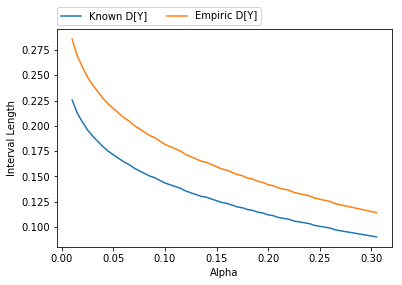

In [90]:
a1 = np.copy(alphas)
l1 = np.copy(lens)
lens = []

#print(laplaces)
for i in range(len(laplaces)):
    interval_len = 2 * get_interval(np.sqrt(d_y_theor), laplaces[i], n)
    lens.append(interval_len)
    #print('alpha = {a}, interval length: {ln}'.format(a=alphas[i], ln=interval_len))

plt.ylabel('Interval Length')
plt.xlabel('Alpha')
plt.plot(alphas, lens, label='Known D[Y]')
plt.plot(a1, l1, label='Empiric D[Y]')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, borderaxespad=0.)
plt.show()

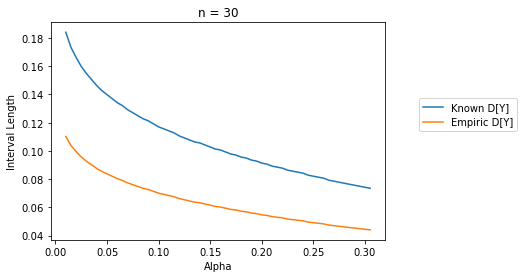

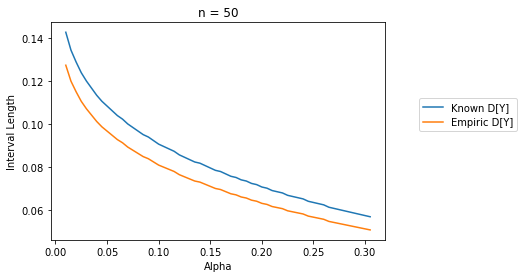

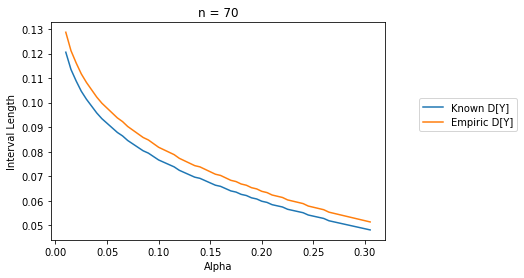

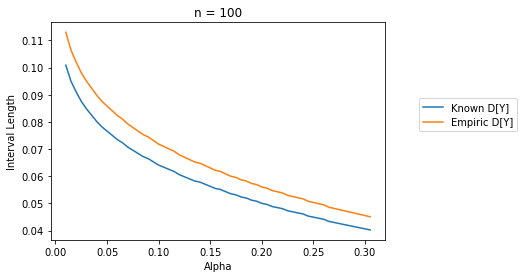

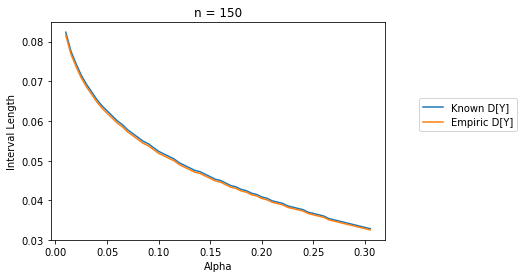

In [126]:
def build_solution(n):
    X, Y, Y_var, F, n = build_sample(n)
    m_p = np.sum(Y_var) / n
    d_p = np.sum((Y_var - m_p)**2) / (n - 1)
    alphas = np.arange(0.01, 0.31, 0.005)
    laplaces = (1 - alphas) / 2
    lens = []
    for i in range(len(laplaces)):
        interval_len = 2 * get_interval(np.sqrt(d_p), laplaces[i], n)
        lens.append(interval_len)
        
    a1 = np.copy(alphas)
    l1 = np.copy(lens)
    lens = []
    for i in range(len(laplaces)):
        interval_len = 2 * get_interval(np.sqrt(d_y_theor), laplaces[i], n)
        lens.append(interval_len)
    plt.title('n = {0}'.format(n))
    plt.ylabel('Interval Length')
    plt.xlabel('Alpha')
    plt.plot(alphas, lens, label='Known D[Y]')
    plt.plot(a1, l1, label='Empiric D[Y]')
    plt.legend(bbox_to_anchor=(1.1, 0.5, 0., 0.), loc=3,
                   ncol=1, borderaxespad=0.)
    plt.show()

for n1 in [30, 50, 70, 100, 150]:
    build_solution(n1)

### Построим графики зависимости длины интервала от числа элементов выборки (a=0.05) 

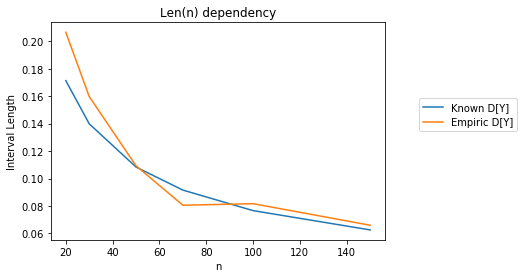

In [131]:
def get_interval_len(n, alpha=0.05):
    X, Y, Y_var, F, n = build_sample(n)
    m_p = np.sum(Y_var) / n
    d_p = np.sum((Y_var - m_p)**2) / (n - 1)
    laplace = (1 - alpha) / 2
    interval_len_emp = 2 * get_interval(np.sqrt(d_p), laplace, n)
    interval_len_theor = 2 * get_interval(np.sqrt(d_y_theor), laplace, n)
    return interval_len_emp, interval_len_theor

lens_emp = []
lens_theor = []
n_vals = [20, 30, 50, 70, 100, 150]
for n1 in n_vals:
    len_emp, len_theor = get_interval_len(n1)
    lens_emp.append(len_emp)
    lens_theor.append(len_theor)
    
plt.title('Len(n) dependency')
plt.ylabel('Interval Length')
plt.xlabel('n')
plt.plot(n_vals, lens_theor, label='Known D[Y]')
plt.plot(n_vals, lens_emp, label='Empiric D[Y]')
plt.legend(bbox_to_anchor=(1.1, 0.5, 0., 0.), loc=3,
                   ncol=1, borderaxespad=0.)
plt.show()

### Найдем доверительные интервалы для дисперсии

In [133]:
from scipy.stats import chi2

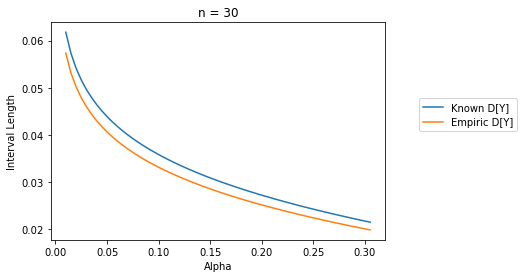

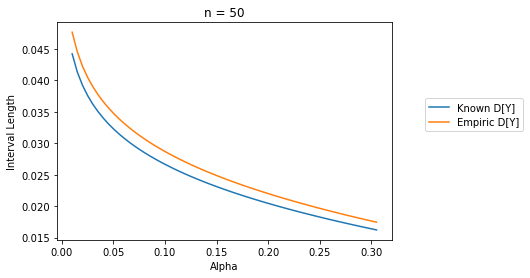

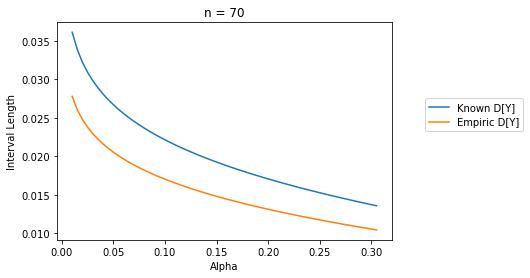

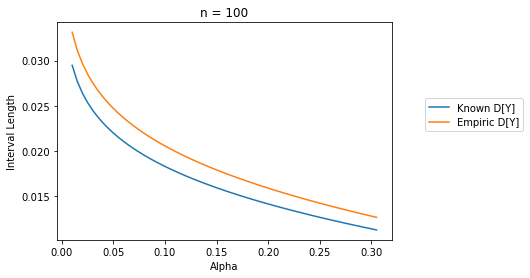

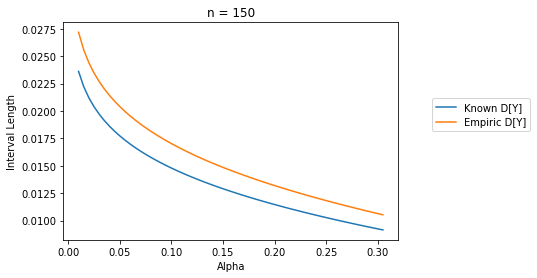

In [137]:
def get_dispersion_intervals(s_sqr, alpha, n):
    return s_sqr * (n - 1) / chi2.ppf(1 - alpha / 2, n - 1), s_sqr * (n - 1) / chi2.ppf(alpha / 2, n - 1)

def get_dispersion_intervals_known(s_sqr, alpha, n):
    return s_sqr * n / chi2.ppf(1 - alpha / 2, n), s_sqr * n / chi2.ppf(alpha / 2, n)

def build_solution_dispersion(n):
    X, Y, Y_var, F, n = build_sample(n)
    m_p = np.sum(Y_var) / n
    d_p = np.sum((Y_var - m_p)**2) / (n - 1)
    alphas = np.arange(0.01, 0.31, 0.005)
    lens = []
    for i in range(len(laplaces)):
        l, r = get_dispersion_intervals(d_p, alphas[i], n)
        lens.append(r - l)
        
    a1 = np.copy(alphas)
    l1 = np.copy(lens)
    lens = []
    for i in range(len(laplaces)):
        l, r = get_dispersion_intervals_known(d_y_theor, alphas[i], n)
        lens.append(r - l)
    plt.title('n = {0}'.format(n))
    plt.ylabel('Interval Length')
    plt.xlabel('Alpha')
    plt.plot(alphas, lens, label='Known D[Y]')
    plt.plot(a1, l1, label='Empiric D[Y]')
    plt.legend(bbox_to_anchor=(1.1, 0.5, 0., 0.), loc=3,
                   ncol=1, borderaxespad=0.)
    plt.show()

for n1 in [30, 50, 70, 100, 150]:
    build_solution_dispersion(n1)

### Построим графики зависимости длины интервала от числа элементов выборки (a=0.05)

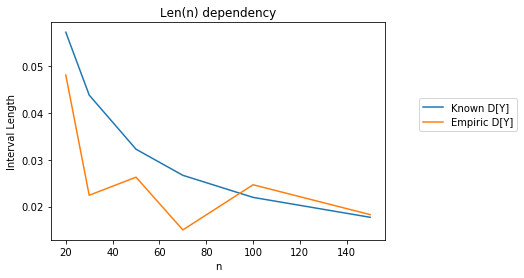

In [139]:
def get_interval_len(n, alpha=0.05):
    X, Y, Y_var, F, n = build_sample(n)
    m_p = np.sum(Y_var) / n
    d_p = np.sum((Y_var - m_p)**2) / (n - 1)
    l_emp, r_emp = get_dispersion_intervals(d_p, alpha, n)
    l_theor, r_theor = get_dispersion_intervals_known(d_y_theor, alpha, n)
    return r_emp - l_emp, r_theor - l_theor

lens_emp = []
lens_theor = []
n_vals = [20, 30, 50, 70, 100, 150]
for n1 in n_vals:
    len_emp, len_theor = get_interval_len(n1)
    lens_emp.append(len_emp)
    lens_theor.append(len_theor)
    
plt.title('Len(n) dependency')
plt.ylabel('Interval Length')
plt.xlabel('n')
plt.plot(n_vals, lens_theor, label='Known D[Y]')
plt.plot(n_vals, lens_emp, label='Empiric D[Y]')
plt.legend(bbox_to_anchor=(1.1, 0.5, 0., 0.), loc=3,
                   ncol=1, borderaxespad=0.)
plt.show()